In [2]:
using Pkg
Pkg.status()

Project CoastalCurrents v0.1.0
Status `~/CoastalCurrents/Project.toml`
  [a134a8b2] BlackBoxOptim v0.6.3
⌃ [13f3f980] CairoMakie v0.11.11
⌅ [5ae59095] Colors v0.12.11
⌅ [1fbeeb36] CommonDataModel v0.3.4
⌃ [efc8151c] DIVAnd v2.7.11
  [7f46824f] DIVAnd_HFRadar v0.1.0 `https://github.com/gher-uliege/DIVAnd_HFRadar.jl#master`
⌅ [a93c6f00] DataFrames v1.6.1
⌅ [864edb3b] DataStructures v0.18.16
  [38e38edf] GLM v1.9.0
⌃ [5752ebe1] GMT v0.44.8
⌅ [28b8d3ca] GR v0.72.10
  [c91e804a] Gadfly v1.4.1
⌅ [62cb38b5] GeoDataFrames v0.3.8
⌃ [ddc7317b] GeoDatasets v0.1.8
  [855c05df] GeoMapping v0.1.0
⌃ [bb4c363b] GridInterpolations v1.1.3
⌅ [a98d9a8b] Interpolations v0.15.1
⌃ [033835bb] JLD2 v0.4.46
⌃ [0f8b85d8] JSON3 v1.14.0
  [23992714] MAT v0.10.7
⌃ [442fdcdd] Measures v0.3.2
⌅ [85f8d34a] NCDatasets v0.14.2
  [5b812ae1] OceanPlot v0.0.0 `https://github.com/gher-uliege/OceanPlot.jl#master`
  [3725be50] PhysOcean v0.6.11 `https://github.com/gher-uliege/PhysOcean.jl#master`
  [f0f68f2c] PlotlyJS v0.18.1

In [1]:
using NCDatasets
using Plots
using DIVAnd
using CoastalCurrents
using Statistics
using PyPlot
using Dates
using Glob
using OceanPlot
using LinearAlgebra
using Interpolations

In [2]:
PyPlot.PyCall.libpython

"/opt/conda/lib/libpython3.10.so.1.0"

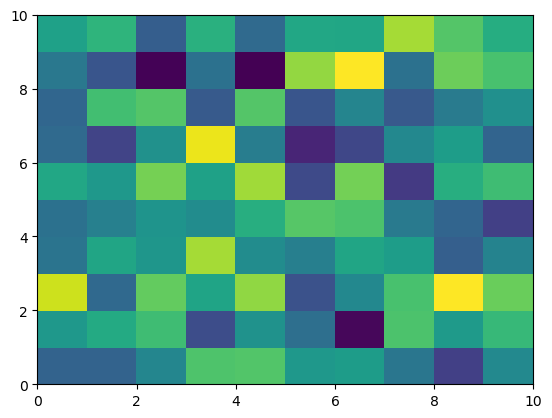

PyObject <matplotlib.collections.PolyQuadMesh object at 0x7f7f60d67640>

In [3]:
pcolor(randn(10,10))

In [4]:
include("/home/jovyan/CoastalCurrents/examples/common.jl")

# DUACS load

In [5]:
# Chargement du datase
ds = NCDataset("/home/jovyan/CoastalCurrents/examples/DUACS/cmems_obs-sl_glo_phy-ssh_my_allsat-l4-duacs-0.125deg_2021.nc")

lon_geos = replace(ds["longitude"][:], missing => NaN)
lat_geos = replace(ds["latitude"][:], missing => NaN)

u_geos = replace(ds["ugos"][:,:,:], missing => NaN)
v_geos = replace(ds["vgos"][:,:,:], missing => NaN)

time_geos = replace(ds["time"][:], missing => NaN)

close(ds)

closed Dataset

In [6]:
# Load Mask coordinates for the observations

mask_geos,(pm_geos,pn_geos),(xi_geos,yi_geos) = DIVAnd.domain(bathname,bathisglobal,lon_geos,lat_geos); # LES DEUX INVERSES SINON CA MARCHE PAS CACA
mask_geos = DIVAnd.floodfill(mask_geos) .== 1;

In [7]:
days_in_month = [31,28,31,30,31,30,31,31,30,31,30,31];

In [8]:
#u_geos[:,:,:]

In [9]:
# Take speed for any month
u_geosjan = u_geos[:,:,1:days_in_month[1]];
v_geosjan = v_geos[:,:,1:days_in_month[1]];

In [10]:
u_geosfev = u_geos[:,:,days_in_month[1]+1:sum(days_in_month[1:2])];
v_geosfev = v_geos[:,:,days_in_month[1]+1:sum(days_in_month[1:2])];

In [11]:
u_geosmar = u_geos[:,:,sum(days_in_month[1:2])+1:sum(days_in_month[1:3])];
v_geosmar = v_geos[:,:,sum(days_in_month[1:2])+1:sum(days_in_month[1:3])];

In [12]:
u_geosavr = u_geos[:,:,sum(days_in_month[1:3])+1:sum(days_in_month[1:4])];
v_geosavr = v_geos[:,:,sum(days_in_month[1:3])+1:sum(days_in_month[1:4])];

In [13]:
u_geosmai = u_geos[:,:,sum(days_in_month[1:4])+1:sum(days_in_month[1:5])];
v_geosmai = v_geos[:,:,sum(days_in_month[1:4])+1:sum(days_in_month[1:5])];

In [14]:
u_geosjun = u_geos[:,:,sum(days_in_month[1:5])+1:sum(days_in_month[1:6])];
v_geosjun = v_geos[:,:,sum(days_in_month[1:5])+1:sum(days_in_month[1:6])];

In [15]:
u_geosjul = u_geos[:,:,sum(days_in_month[1:6])+1:sum(days_in_month[1:7])];
v_geosjul = v_geos[:,:,sum(days_in_month[1:6])+1:sum(days_in_month[1:7])];

In [16]:
u_geosaou = u_geos[:,:,sum(days_in_month[1:7])+1:sum(days_in_month[1:8])];
v_geosaou = v_geos[:,:,sum(days_in_month[1:7])+1:sum(days_in_month[1:8])];

In [17]:
u_geossep = u_geos[:,:,sum(days_in_month[1:8])+1:sum(days_in_month[1:9])];
v_geossep = v_geos[:,:,sum(days_in_month[1:8])+1:sum(days_in_month[1:9])];

In [18]:
u_geosoct = u_geos[:,:,sum(days_in_month[1:9])+1:sum(days_in_month[1:10])];
v_geosoct = v_geos[:,:,sum(days_in_month[1:9])+1:sum(days_in_month[1:10])];

In [19]:
u_geosnov = u_geos[:,:,sum(days_in_month[1:10])+1:sum(days_in_month[1:11])];
v_geosnov = v_geos[:,:,sum(days_in_month[1:10])+1:sum(days_in_month[1:11])];

In [20]:
u_geosdec = u_geos[:,:,sum(days_in_month[1:11])+1:sum(days_in_month[1:12])];
v_geosdec = v_geos[:,:,sum(days_in_month[1:11])+1:sum(days_in_month[1:12])];

In [21]:
# Moyenne par mois sur l'année
u_gmjan = mean(u_geosjan, dims=3);v_gmjan = mean(v_geosjan, dims=3);
speed_gmjan = sqrt.(u_gmjan[:,:,1].^2 + v_gmjan[:,:,1].^2);    

u_gmfev = mean(u_geosfev, dims=3);v_gmfev = mean(v_geosfev, dims=3);
speed_gmfev = sqrt.(u_gmfev[:,:,1].^2 + v_gmfev[:,:,1].^2);    

In [22]:
u_gmmar = mean(u_geosmar, dims=3);v_gmmar = mean(v_geosmar, dims=3);
speed_gmmar = sqrt.(u_gmmar[:,:,1].^2 + v_gmmar[:,:,1].^2);    

u_gmavr = mean(u_geosavr, dims=3);v_gmavr = mean(v_geosavr, dims=3);
speed_gmavr = sqrt.(u_gmavr[:,:,1].^2 + v_gmavr[:,:,1].^2);    

u_gmmai = mean(u_geosmai, dims=3);v_gmmai = mean(v_geosmai, dims=3);
speed_gmmai = sqrt.(u_gmmai[:,:,1].^2 + v_gmmai[:,:,1].^2);    

u_gmjun = mean(u_geosjun, dims=3);v_gmjun = mean(v_geosjun, dims=3);
speed_gmjun = sqrt.(u_gmjun[:,:,1].^2 + v_gmjun[:,:,1].^2);    


u_gmjul = mean(u_geosjul, dims=3);v_gmjul = mean(v_geosjul, dims=3);
speed_gmjul = sqrt.(u_gmjul[:,:,1].^2 + v_gmjul[:,:,1].^2);  

u_gmaou = mean(u_geosaou, dims=3);v_gmaou = mean(v_geosaou, dims=3);
speed_gmaou = sqrt.(u_gmaou[:,:,1].^2 + v_gmaou[:,:,1].^2);    

u_gmsep = mean(u_geossep, dims=3);v_gmsep = mean(v_geossep, dims=3);
speed_gmsep = sqrt.(u_gmsep[:,:,1].^2 + v_gmsep[:,:,1].^2);    

u_gmoct = mean(u_geosoct, dims=3);v_gmoct = mean(v_geosoct, dims=3);
speed_gmoct = sqrt.(u_gmoct[:,:,1].^2 + v_gmoct[:,:,1].^2);    

u_gmnov = mean(u_geosnov, dims=3);v_gmnov = mean(v_geosnov, dims=3);
speed_gmnov = sqrt.(u_gmnov[:,:,1].^2 + v_gmnov[:,:,1].^2);    

u_gmdec = mean(u_geosdec, dims=3);v_gmdec = mean(v_geosdec, dims=3);
speed_gmdec = sqrt.(u_gmdec[:,:,1].^2 + v_gmdec[:,:,1].^2);    

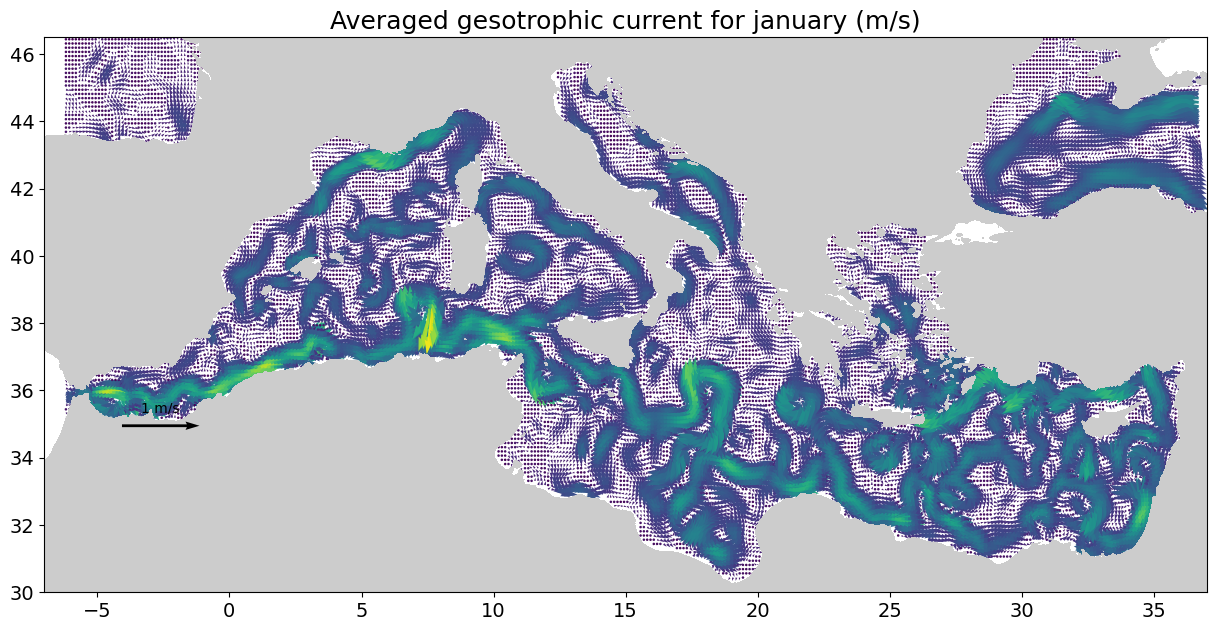

In [23]:
# Output graphique

PyPlot.figure(figsize=(15, 8))

clf(); q=PyPlot.quiver(xi_geos,yi_geos,u_gmjan[:,:,1],v_gmjan[:,:,1],speed_gmjan[:,:],scale=15) #scala parameter to change (length of the arrows)

quiverkey(q,0.1,0.3,1,"1 m/s")
xlim(-7,37)
ylim(30.,46.5)
clim(0,0.55)

title("Averaged gesotrophic current for january (m/s)", fontsize=18)
PyPlot.xticks(fontsize=14)
PyPlot.yticks(fontsize=14)

CoastalCurrents.Plotting.plotmap(bathname)

# DIVAnd load

In [24]:
# Chargement du dataset
year = 2021
lon_obs,lat_obs,u_obs_coar,v_obs_coar = DIVA_results(year);
speed_obs = sqrt.(u_obs_coar[:,:,:].^2 + v_obs_coar[:,:,:].^2);    

In [25]:
mask_obs,(pm_obs,pn_obs),(xi_obs,yi_obs) = DIVAnd.domain(bathname,bathisglobal,lon_obs,lat_obs) # LES DEUX INVERSES SINON CA MARCHE PAS CACA
mask_obs = DIVAnd.floodfill(mask_obs) .== 1
hx_obs, hy_obs, h_obs = DIVAnd.load_bath(bathname, bathisglobal, lat_obs, lon_obs);

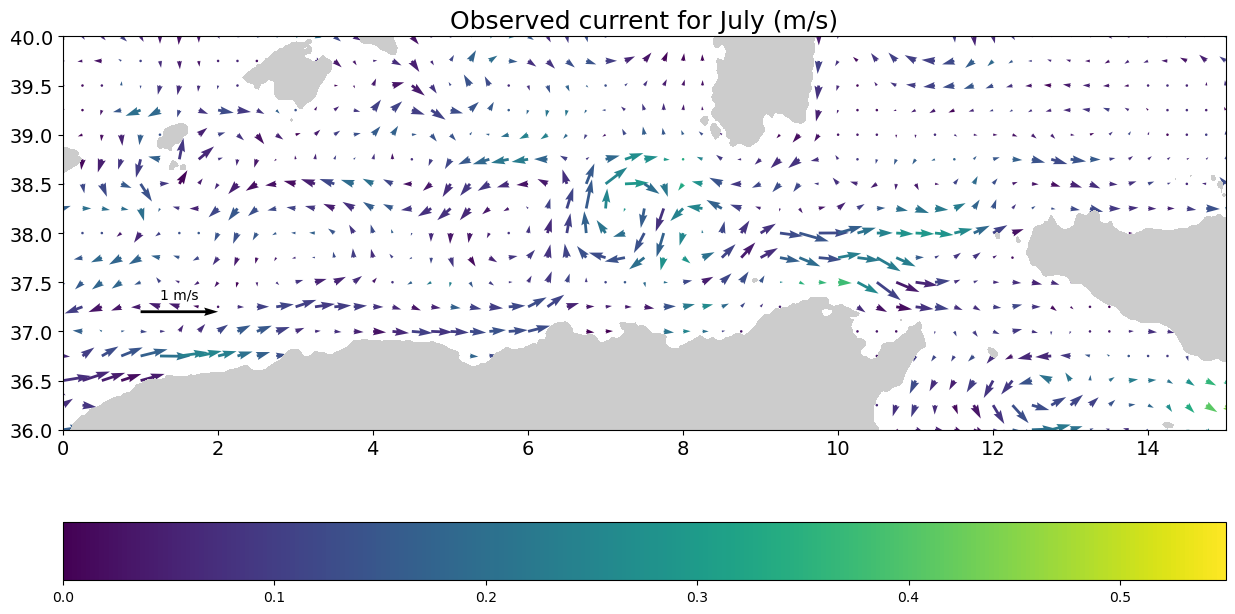

In [26]:
# Output graphique

PyPlot.figure(figsize=(15, 8))

clf(); q=PyPlot.quiver(xi_obs,yi_obs,u_obs_coar[:,:,1],v_obs_coar[:,:,1],speed_obs[:,:,7],scale=15) #scala parameter to change (length of the arrows)

quiverkey(q,0.1,0.3,1,"1 m/s")
xlim(-0,15)
ylim(36,40)
clim(0,0.55)

colorbar(orientation="horizontal")
title("Observed current for July (m/s)", fontsize=18)
PyPlot.xticks(fontsize=14)
PyPlot.yticks(fontsize=14)

CoastalCurrents.Plotting.plotmap(bathname)

# DUACS regredding

## Regridding juste pour un mois

In [27]:
# vecteurs de coordonnées de la grille source
x_geos = xi_geos[:,1];      # 1ère dimension
y_geos = yi_geos[1,:];      # 2ème dimension

# champs u et v sur cette grille
u_geos = u_gmdec[:,:,1];
v_geos = v_gmdec[:,:,1];

In [28]:
itp_u = extrapolate(interpolate((x_geos, y_geos), u_geos, Gridded(Linear())), NaN); # interpolateur avec la grille et les valeurs
itp_v = extrapolate(interpolate((x_geos, y_geos), v_geos, Gridded(Linear())), NaN);

In [29]:
x_obs = xi_obs;
y_obs = yi_obs;

In [30]:
u_geos_itp = [itp_u(x_obs[i], y_obs[i]) for i in eachindex(x_obs)]; # placer duacs sur diva
v_geos_itp = [itp_v(x_obs[i], y_obs[i]) for i in eachindex(y_obs)];

# Remettre en forme pour correspondre à la grille
u_geos_itp = reshape(u_geos_itp, size(x_obs));
v_geos_itp = reshape(v_geos_itp, size(y_obs));

In [31]:
speed_geos_itp = sqrt.(u_geos_itp[:,:].^2 + v_geos_itp[:,:].^2);    

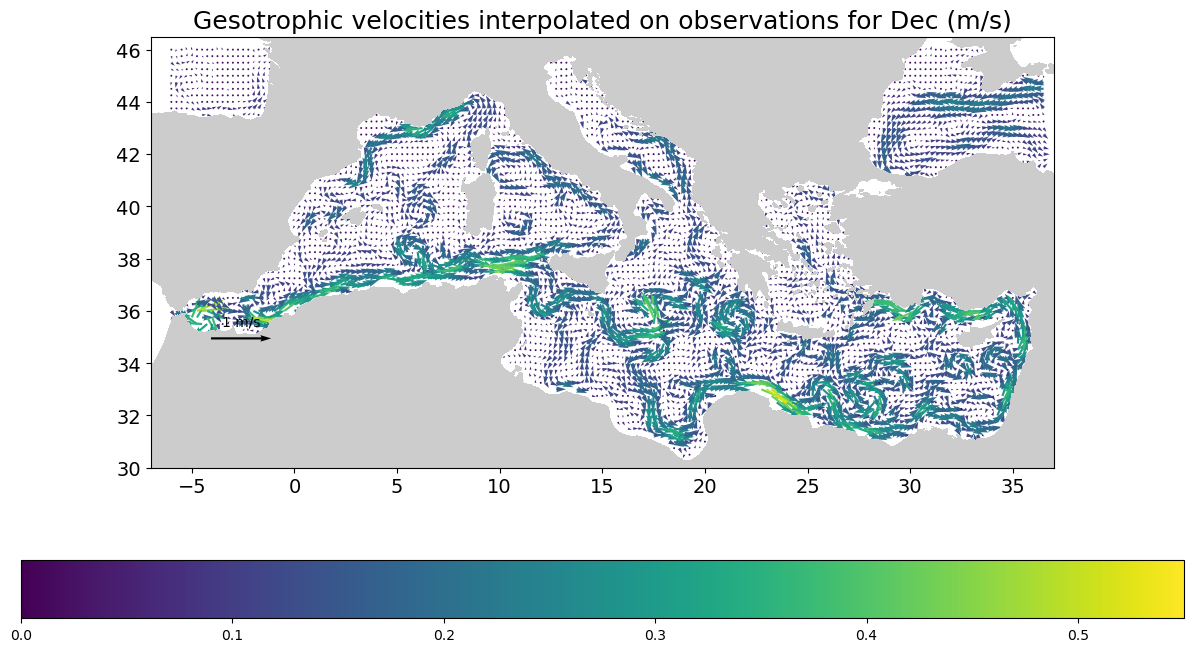

In [32]:
# Output graphique

PyPlot.figure(figsize=(15, 8))

clf(); q=PyPlot.quiver(xi_obs,yi_obs,u_geos_itp[:,:],v_geos_itp[:,:],speed_geos_itp[:,:],scale=15) #scala parameter to change (length of the arrows)

quiverkey(q,0.1,0.3,1,"1 m/s")
xlim(-7,37)
ylim(30.,46.5)
clim(0,0.55)

colorbar(orientation="horizontal")
title("Gesotrophic velocities interpolated on observations for Dec (m/s)", fontsize=18)
PyPlot.xticks(fontsize=14)
PyPlot.yticks(fontsize=14)

CoastalCurrents.Plotting.plotmap(bathname)

# DUACS validation

In [33]:
include("IndepDriftersLoad.jl")

IndepDriftersLoad (generic function with 1 method)

In [34]:
lonval,latval,timeval,uval,vval = IndepDriftersLoad();

fname = "/home/jovyan/tmp/BlueCloud2026/Drifter/my.cmems-du.eu/Core/INSITU_GLO_PHY_UV_DISCRETE_MY_013_044/cmems_obs-ins_glo_phy-cur_my_drifter_PT6H/history/Dr1.nc"
length(lon) = 465701
length(lat) = 465701


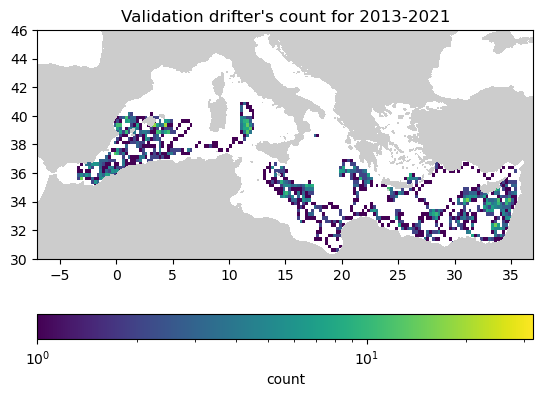

In [35]:
# Plot of the data to better see the repartition

plt.hist2d(lonval,latval,(lonr,latr),norm=matplotlib.colors.LogNorm())
colorbar(orientation="horizontal",label="count")
CoastalCurrents.Plotting.plotmap(bathname)
title("Validation drifter's count for 2013-2021");

#PyPlot.savefig(joinpath(save_results, "drifter_spacecoverage_allT.png"))

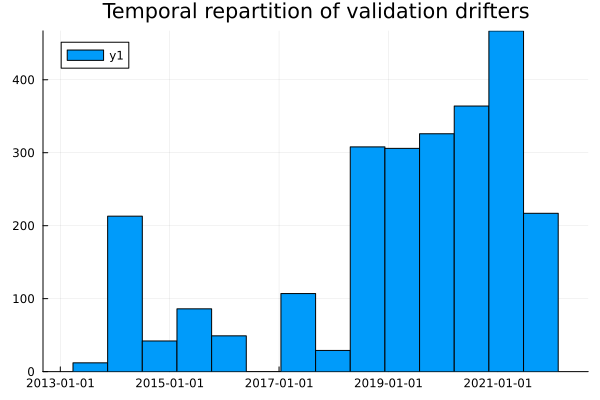

In [36]:
p1 = histogram(uval,timeval,lw = 1)
title!("Temporal repartition of validation drifters")

In [37]:
# Valeur à interpoler
itp_ugeos = interpolate((xi_obs[:,1], yi_obs[1,:]), u_geos_itp[:,:], Gridded(Linear())); # interpolateur pour aller sur les observations
itp_vgeos = interpolate((xi_obs[:,1], yi_obs[1,:]), v_geos_itp[:,:], Gridded(Linear()));

selval = @. Dates.DateTime(2021,12,1) <= timeval < Dates.DateTime(2021,12,31); # Taking only drifters from the selected period

# Sur les observations
xval = lonval[selval];
yval = latval[selval];

# Inteprolation of results on the observations
reinterpole_ugeos = itp_ugeos.(xval,yval); # valeur du produit geostrophique sur la position des drifters du mois de selval
reinterpole_vgeos = itp_vgeos.(xval,yval);

In [38]:
# Gesotrophy velocity interpolated on drifters for July 2021

reinterpole_ugeos;
nan_indices = findall(isnan, reinterpole_ugeos)
reinterpole_ugeos_clean = deleteat!(copy(reinterpole_ugeos), nan_indices);

In [39]:
reinterpole_vgeos;
nan_indices = findall(isnan, reinterpole_vgeos)
reinterpole_vgeos_clean = deleteat!(copy(reinterpole_vgeos), nan_indices);

In [40]:
# Validation drifter for July 2021

uval[selval];
uval_clean = deleteat!(copy(uval[selval]), nan_indices);


vval[selval];
vval_clean = deleteat!(copy(vval[selval]), nan_indices);


In [41]:
println(size(uval[selval]))
println(size(reinterpole_vgeos_clean))

(30,)
(6,)


In [42]:
RMSu = sqrt(sum((reinterpole_ugeos_clean .- uval_clean).^2)/length(reinterpole_ugeos_clean))
RMSv = sqrt(sum((reinterpole_vgeos_clean .- vval_clean).^2)/length(reinterpole_vgeos_clean))
println(RMSu," ",RMSv)

0.09778324231070566 0.06795226292285686


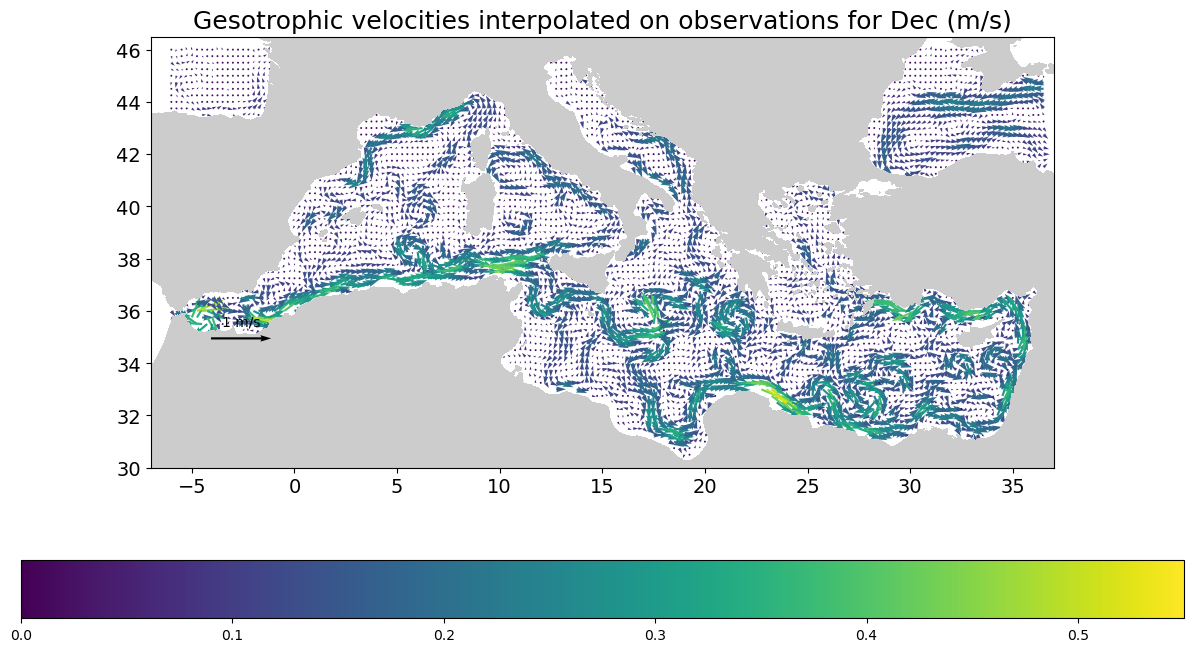

In [43]:
# Output graphique

PyPlot.figure(figsize=(15, 8))

clf(); q=PyPlot.quiver(xi_obs,yi_obs,u_geos_itp[:,:],v_geos_itp[:,:],speed_geos_itp[:,:],scale=15) #scala parameter to change (length of the arrows)

quiverkey(q,0.1,0.3,1,"1 m/s")
xlim(-7,37)
ylim(30.,46.5)
clim(0,0.55)

colorbar(orientation="horizontal")
title("Gesotrophic velocities interpolated on observations for Dec (m/s)", fontsize=18)
PyPlot.xticks(fontsize=14)
PyPlot.yticks(fontsize=14)

CoastalCurrents.Plotting.plotmap(bathname)

In [44]:
# validation

println(size(uval_clean))
println(size(vval_clean))
println(size(xval))
println(size(yval))

(6,)
(6,)
(30,)
(30,)


In [45]:
println(size(xi_obs))
println(size(yi_obs))
println(size(u_geos_itp))
println(size(v_geos_itp))

(177, 65)
(177, 65)
(177, 65)
(177, 65)


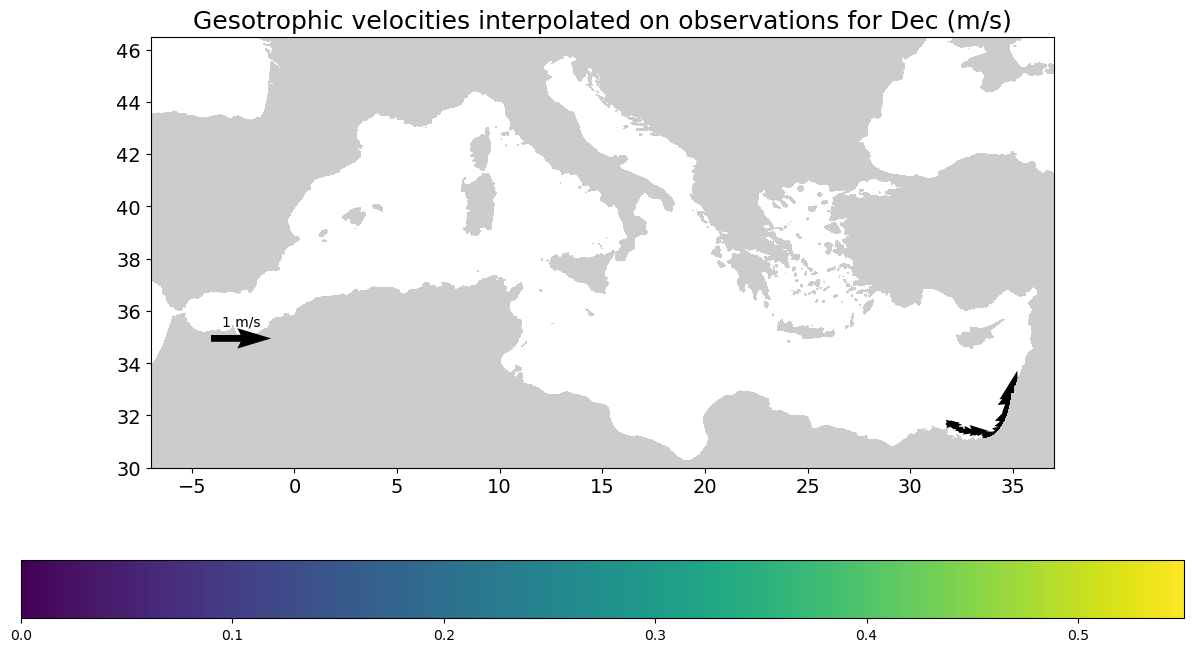

In [46]:
# Output graphique

PyPlot.figure(figsize=(15, 8))

clf(); q=PyPlot.quiver(xval,yval,uval[selval],vval[selval],scale=15) #scala parameter to change (length of the arrows)

quiverkey(q,0.1,0.3,1,"1 m/s")
xlim(-7,37)
ylim(30.,46.5)
clim(0,0.55)

colorbar(orientation="horizontal")
title("Gesotrophic velocities interpolated on observations for Dec (m/s)", fontsize=18)
PyPlot.xticks(fontsize=14)
PyPlot.yticks(fontsize=14)

CoastalCurrents.Plotting.plotmap(bathname)

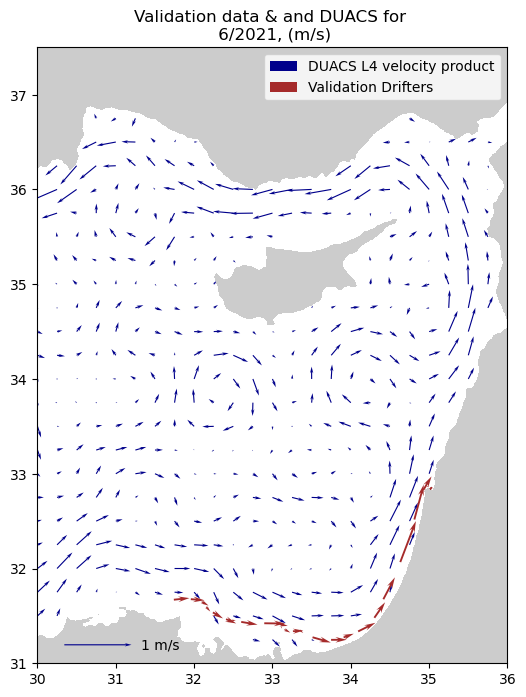

In [47]:
figure(figsize=(15, 8))
clf()

# --- Premier champ ---
q1 = PyPlot.quiver(xi_obs, yi_obs, u_geos_itp, v_geos_itp, 
    color = "darkblue",
    label="DUACS L4 velocity product",
    scale=7, 
    headwidth = 3, 
    headlength=6) 

# --- Second champ (superposé) ---
q2 = PyPlot.quiver(xval, yval, uval[selval], vval[selval], 
    scale=7, 
    color="brown", 
    label="Validation Drifters",
    headwidth = 3,
    headlength=6,
    width=0.004)   




# Ajout de la flèche de référence
quiverkey(q1, X=0.2, Y=0.03, U=1,
             label="1 m/s", labelpos="E",
             coordinates="axes")
#quiverkey(q1,0.1,0.3,1,"1 m/s")


# Ajouter une légende pour différencier les deux
legend(loc="upper right")

# Axes, limites, titres
xlim(30, 36)
ylim(31, 37.5)
title("Validation data & and DUACS for \n 6/$(year), (m/s)")

# Climatologie couleurs : un seul colorbar possible ?
# Attention, ici il y a deux jeux de vitesses en couleur ; 
# tu peux choisir d’afficher la couleur d’un seul des deux ou créer une colorbar personnalisée.

CoastalCurrents.Plotting.plotmap(bathname)

PyPlot.savefig("/home/jovyan/CoastalCurrents/examples/save_results_valid/Valid6_21DUACS")

# Mise en graphique des validations

In [50]:
using Plots

# --- Données ---
months = [
    "Jan","Feb","Mar","Apr","May","Jun",
    "Jul","Aug","Sep","Oct","Nov","Dec"
]

meridional_vel = [0.093, 0.157, 0.113, 0.136, 0.065, 0.045, 0.096, 0.153, 0.059, 0.086, 0.071, 0.072]
zonal_vel      = [0.094, 0.148, 0.076, 0.098, 0.060, 0.042, 0.096, 0.136, 0.068, 0.078, 0.053, 0.029]
merid_geo      = [0.138, 0.235, 0.158, 0.215, 0.083, 0.058, 0.153, 0.195, 0.109, 0.119, 0.102, 0.098]
zonal_geo      = [0.126, 0.185, 0.118, 0.159, 0.118, 0.092, 0.119, 0.163, 0.105, 0.107, 0.075, 0.068]

data = hcat(meridional_vel, zonal_vel, merid_geo, zonal_geo)


12×4 Matrix{Float64}:
 0.093  0.094  0.138  0.126
 0.157  0.148  0.235  0.185
 0.113  0.076  0.158  0.118
 0.136  0.098  0.215  0.159
 0.065  0.06   0.083  0.118
 0.045  0.042  0.058  0.092
 0.096  0.096  0.153  0.119
 0.153  0.136  0.195  0.163
 0.059  0.068  0.109  0.105
 0.086  0.078  0.119  0.107
 0.071  0.053  0.102  0.075
 0.072  0.029  0.098  0.068

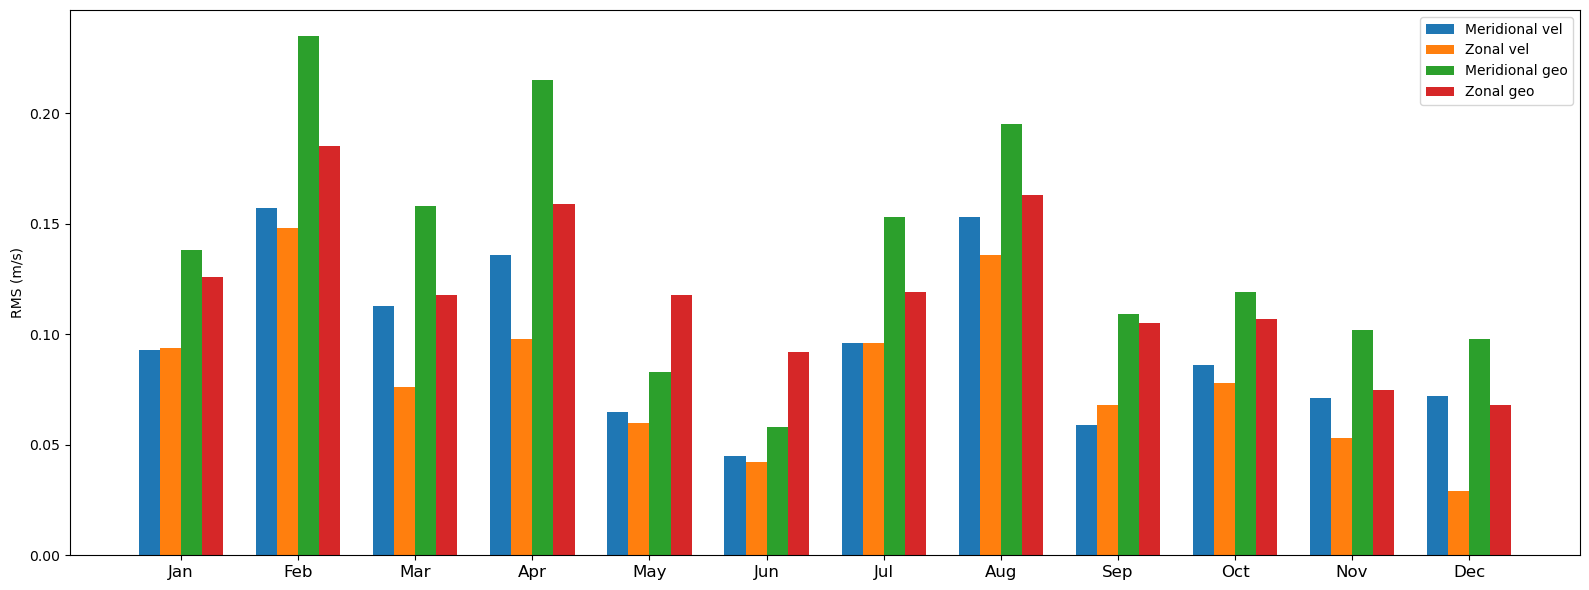

In [53]:

# positions sur l'axe X
x = collect(1:length(months))

# nombre de séries (4 colonnes dans data)
n = size(data, 2)

# largeur de chaque barre
width = 0.18

figure(figsize=(16,6))
clf()

# tracer chaque série avec un décalage
for i in 1:n
    PyPlot.bar(x .+ (i - (n+1)/2) * width, data[:, i], width, label=["Meridional vel" "Zonal vel" "Meridional geo" "Zonal geo"][i])
end

PyPlot.xticks(x, months, fontsize=12)
ylabel("RMS (m/s)")
legend()
tight_layout()

In [55]:
# --- Moyennes vel–geo ---
diva_avg = (meridional_vel .+ zonal_vel) ./ 2
geos_avg      = (merid_geo      .+ zonal_geo) ./ 2

data_avg = hcat(diva_avg, geos_avg)

12×2 Matrix{Float64}:
 0.0935  0.132
 0.1525  0.21
 0.0945  0.138
 0.117   0.187
 0.0625  0.1005
 0.0435  0.075
 0.096   0.136
 0.1445  0.179
 0.0635  0.107
 0.082   0.113
 0.062   0.0885
 0.0505  0.083

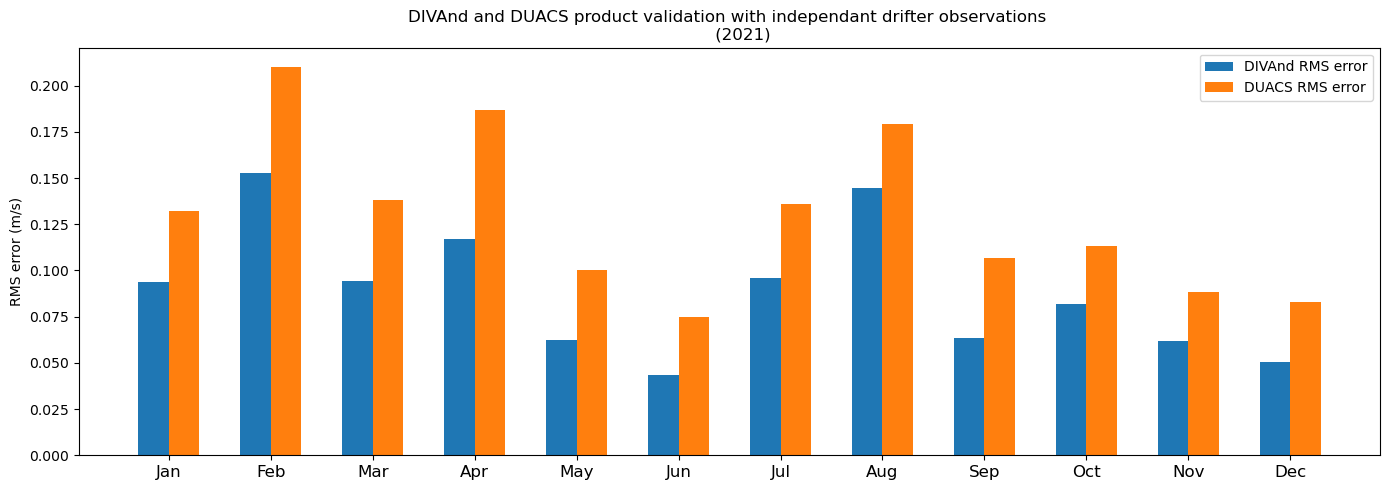

In [140]:
x = collect(1:length(months))
n = size(data_avg, 2)
width = 0.30   # seulement 2 séries → barres plus larges

figure(figsize=(14,5))
clf()

labels_avg = ["DIVAnd RMS error", "DUACS RMS error"]

for i in 1:n
    PyPlot.bar(
        x .+ (i - (n+1)/2) * width,
        data_avg[:, i],
        width,
        label = labels_avg[i],
          
    )
end

PyPlot.xticks(x, months, fontsize=12)
ylabel("RMS error (m/s)")
title("DIVAnd and DUACS product validation with independant drifter observations 
     (2021)")
legend()
tight_layout()
PyPlot.savefig("/home/jovyan/CoastalCurrents/examples/save_results_valid/Valid_complet_histogram")


# DIVAnd - DUCAS

In [48]:
u_diff = u_obs_coar[:,:,1] - u_geos_itp[:,:];
v_diff = v_obs_coar[:,:,1] - v_geos_itp[:,:];

In [49]:
speed_diff = sqrt.(u_diff[:,:].^2 + v_diff[:,:].^2);    

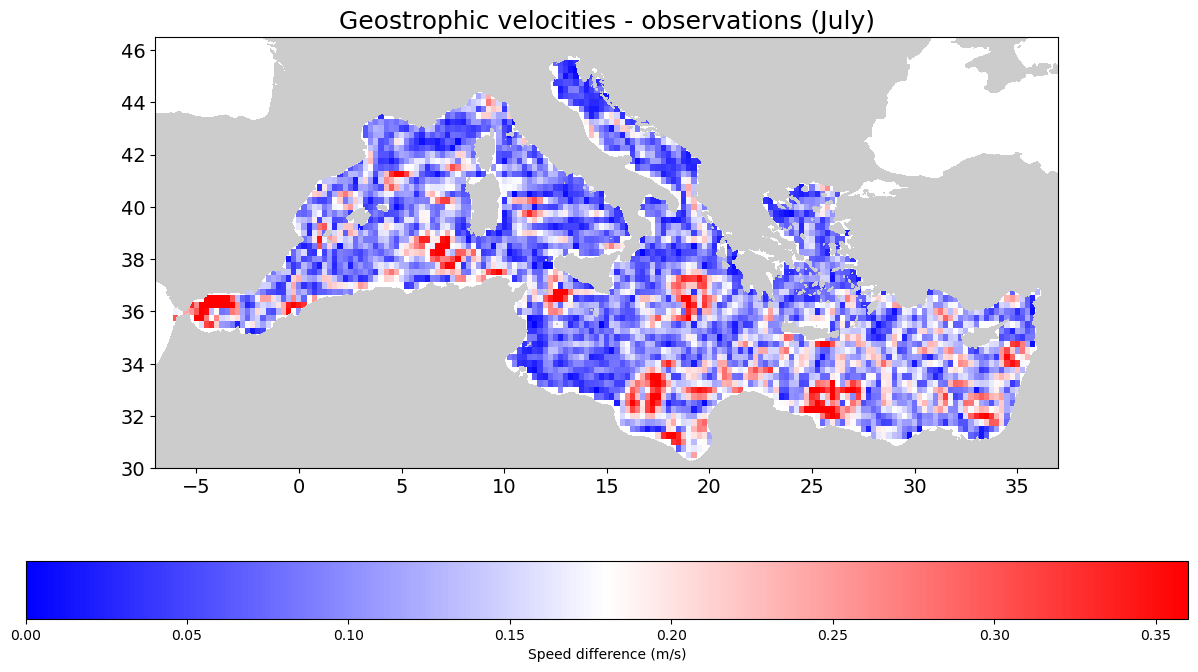

In [50]:
# Figure
figure(figsize=(15,8))

# Heatmap avec pcolormesh
# xi_obs et yi_obs doivent être des matrices 2D
pcolormesh(xi_obs, yi_obs, speed_diff, cmap="bwr")  # ou "hot", "plasma"...
colorbar(orientation="horizontal", label="Speed difference (m/s)")

# Limites
xlim(-7,37)
ylim(30,46.5)
clim(0,0.36)

title("Geostrophic velocities - observations (July)", fontsize=18)
PyPlot.xticks(fontsize=14)
PyPlot.yticks(fontsize=14)

# Ajouter la bathymétrie si tu veux
CoastalCurrents.Plotting.plotmap(bathname)

